In [20]:
import deepxde as dde
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("der_training_data-31200-elements.csv", index_col=0)
df.head()

x_features = ["VaR", "VaI", "VbR", "VbI", "VcR", "VcI"]

X_train_0 = []
X_train_1 = []
y_temp = []
der_ids = list(df.der_id.unique())
n_timestamps = len(df[df["der_id"] == der_ids[0]])
n_samples = len(der_ids)

for i in range(n_samples):
    df_subset = df[i*n_timestamps:(i+1)*n_timestamps] #clarification here?   
    X_train_0.append(df_subset["VaR"].values)
    y_temp.append(df_subset["P"].values)
X_train_1.append(df_subset["t"].values)

n_train_samples = int(n_samples * 0.8)
X_train_0 = np.array(X_train_0)
y_temp = np.array(y_temp)
X_train = (X_train_0[0:n_train_samples], np.array(X_train_1).T)
X_test = (X_train_0[n_train_samples:], np.array(X_train_1).T)
y_train = y_temp[0:n_train_samples]
y_test = y_temp[n_train_samples:]

data = dde.data.TripleCartesianProd(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Choose a network
m = n_timestamps
dim_x = 1
net = dde.nn.DeepONetCartesianProd(
    [m, 85, 85], [dim_x, 85, 85], "relu", "Glorot normal"
)

# Initialize a list to store all loss histories
all_losses = []

# Run neural network 10 times
num_run = 10
for run_idx in range(num_run):
    # Define a Model
    model = dde.Model(data, net)
    # Compile and Train
    model.compile("adam", lr=0.001, metrics=["mean l2 relative error"])

    losshistory, train_state = model.train(iterations=500000)

     #all_losses.append(losshistory.losses) or all_losses.append(losshistory.losses()) # Collect the loss history for this run

# Plot the loss trajectory for all runs
dde.utils.plot_loss_history(losshistory)
plt.savefig(f"loss_history_n_samples-{n_train_samples}")
plt.show()

plt.figure(figsize=(10, 6))
for i, losshistory in enumerate(all_losses):
    plt.plot(losshistory, label=f"Run {i + 1}")

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title(f"Loss vs. Step for {num_run} Runs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Compiling model...
Building DeepONetCartesianProd...
'build' took 0.084031 s



c:\Users\slhota\Desktop\Notebook\.venv\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\deeponet.py:312: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_func = tf.layers.dense(
c:\Users\slhota\Desktop\Notebook\.venv\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\deeponet.py:319: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_func = tf.layers.dense(
c:\Users\slhota\Desktop\Notebook\.venv\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\deeponet.py:331: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_loc = tf.layers.dense(


'compile' took 0.755581 s

Training model...

0         [2.07e+09]    [2.07e+09]    [9.97e-01]    
1000      [6.19e+05]    [6.10e+05]    [1.71e-02]    
2000      [1.08e+06]    [9.52e+05]    [2.14e-02]    
3000      [7.17e+05]    [6.46e+05]    [1.76e-02]    
4000      [5.78e+05]    [5.63e+05]    [1.64e-02]    
5000      [7.82e+05]    [8.56e+05]    [2.03e-02]    
6000      [5.66e+05]    [5.56e+05]    [1.63e-02]    
7000      [5.64e+05]    [5.54e+05]    [1.63e-02]    
8000      [5.59e+05]    [5.50e+05]    [1.62e-02]    
9000      [5.45e+05]    [5.34e+05]    [1.60e-02]    
10000     [5.81e+05]    [6.10e+05]    [1.71e-02]    
11000     [5.31e+05]    [5.25e+05]    [1.59e-02]    
12000     [7.36e+05]    [6.43e+05]    [1.76e-02]    
13000     [5.25e+05]    [5.19e+05]    [1.58e-02]    
14000     [5.26e+05]    [5.25e+05]    [1.59e-02]    
15000     [6.22e+05]    [6.74e+05]    [1.80e-02]    
16000     [5.21e+05]    [4.99e+05]    [1.55e-02]    
17000     [5.15e+05]    [5.15e+05]    [1.57e-02]    


KeyboardInterrupt: 

(10, 2400) (3, 2400)
(2400, 1) (2400, 1)
Compiling model...
Building DeepONetCartesianProd...
'build' took 0.085684 s



c:\Users\slhota\Desktop\Notebook\.venv\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\deeponet.py:312: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_func = tf.layers.dense(
c:\Users\slhota\Desktop\Notebook\.venv\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\deeponet.py:319: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_func = tf.layers.dense(
c:\Users\slhota\Desktop\Notebook\.venv\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\deeponet.py:331: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_loc = tf.layers.dense(


'compile' took 1.799840 s

Training model...

0         [2.78e+09]    [2.78e+09]    [1.15e+00]    
1000      [1.07e+06]    [9.96e+05]    [2.18e-02]    
2000      [7.82e+05]    [7.98e+05]    [1.96e-02]    
3000      [6.77e+05]    [6.64e+05]    [1.78e-02]    
4000      [6.65e+05]    [6.56e+05]    [1.77e-02]    
5000      [6.68e+05]    [6.44e+05]    [1.76e-02]    
6000      [1.55e+06]    [1.37e+06]    [2.56e-02]    
7000      [7.10e+05]    [6.57e+05]    [1.77e-02]    
8000      [6.41e+05]    [6.35e+05]    [1.75e-02]    
9000      [6.27e+05]    [6.20e+05]    [1.72e-02]    
10000     [6.18e+05]    [6.24e+05]    [1.73e-02]    
11000     [7.55e+05]    [8.20e+05]    [1.98e-02]    
12000     [5.84e+05]    [5.74e+05]    [1.66e-02]    
13000     [5.94e+05]    [6.02e+05]    [1.70e-02]    
14000     [5.82e+05]    [5.75e+05]    [1.66e-02]    
15000     [6.30e+05]    [5.75e+05]    [1.66e-02]    
16000     [5.73e+05]    [5.59e+05]    [1.64e-02]    
17000     [6.78e+05]    [7.30e+05]    [1.87e-02]    


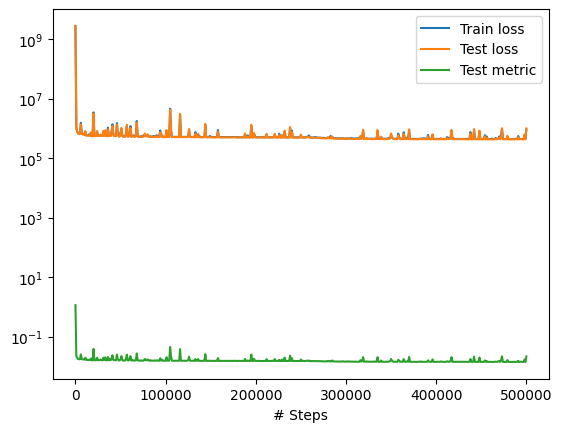

The Minimal loss of the run is 440709.34


In [64]:
import deepxde as dde
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("der_training_data-31200-elements.csv",index_col=0) #"der_training_data-15600-elements.csv"
df.head()

x_features = ["VaR","VaI","VbR","VbI","VcR","VcI"]
"""
x_train = df[x_features].values[0:10000]
y_train = df[["P","Q"]].values[0:10000]
x_test = df[x_features].values[10000:]
y_test = df[["P","Q"]].values[10000:]
x_train.shape[-1],y_train.shape[-1],x_test.shape
"""

X_train_0 =[]
X_train_1 =[]
y_temp = []
der_ids = list(df.der_id.unique())
n_timestamps = len(df[df["der_id"]==der_ids[0]]) 
n_samples =  len(der_ids)

for i in range(n_samples):
    df_subset = df[i*n_timestamps:(i+1)*n_timestamps]    
    X_train_0.append(df_subset["VaR"].values)
    y_temp.append(df_subset["P"].values)
X_train_1.append(df_subset["t"].values)

n_train_samples = int(n_samples*0.8)
X_train_0 = np.array(X_train_0)
y_temp = np.array(y_temp)
X_train = (X_train_0[0:n_train_samples],np.array(X_train_1).T)
X_test = (X_train_0[n_train_samples:],np.array(X_train_1).T)
y_train = y_temp[0:n_train_samples]
y_test = y_temp[n_train_samples:]

print(X_train[0].shape,X_test[0].shape)
print(X_train[1].shape,X_test[1].shape)

data = dde.data.TripleCartesianProd(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Choose a network
m = n_timestamps #100
dim_x = 1
net = dde.nn.DeepONetCartesianProd([m, 50, 50],
                                   [dim_x, 50, 50],
                                    "relu",
                                    "He uniform",
                                  )
# Define a Model
model = dde.Model(data, net)
# Compile and Train
model.compile("adam", lr=0.001, metrics=["mean l2 relative error"])

losshistory, train_state = model.train(iterations=500000)

#Shows minimum Loss
min_loss = np.min(np.array(losshistory.loss_train)[:,0])
# Plot the loss trajectory
dde.utils.plot_loss_history(losshistory)
plt.savefig(f"loss_history_n_samples-{n_train_samples}")
plt.show()
print("The Minimal loss of the run is", min_loss)


(10, 2400) (3, 2400)
(2400, 1) (2400, 1)
Compiling model...
Building DeepONetCartesianProd...
'build' took 0.083360 s



c:\Users\slhota\Desktop\Notebook\.venv\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\deeponet.py:312: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_func = tf.layers.dense(
c:\Users\slhota\Desktop\Notebook\.venv\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\deeponet.py:319: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_func = tf.layers.dense(
c:\Users\slhota\Desktop\Notebook\.venv\Lib\site-packages\deepxde\nn\tensorflow_compat_v1\deeponet.py:331: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y_loc = tf.layers.dense(


'compile' took 1.660836 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [1.94e+09]    [1.94e+09]    [9.64e-01]    
1000      [7.65e+05]    [6.95e+05]    [1.83e-02]    
2000      [6.33e+05]    [6.23e+05]    [1.73e-02]    
3000      [1.43e+06]    [1.58e+06]    [2.76e-02]    
4000      [6.31e+05]    [6.20e+05]    [1.72e-02]    
5000      [6.51e+05]    [6.31e+05]    [1.74e-02]    
6000      [6.31e+05]    [6.20e+05]    [1.72e-02]    
7000      [6.31e+05]    [6.24e+05]    [1.73e-02]    
8000      [6.30e+05]    [6.20e+05]    [1.72e-02]    
9000      [6.30e+05]    [6.19e+05]    [1.72e-02]    
10000     [6.31e+05]    [6.26e+05]    [1.73e-02]    
11000     [1.29e+06]    [1.14e+06]    [2.33e-02]    
12000     [7.05e+05]    [6.41e+05]    [1.75e-02]    
13000     [6.14e+05]    [6.03e+05]    [1.70e-02]    
14000     [5.83e+05]    [5.73e+05]    [1.66e-02]    
15000     [5.68e+05]    [5.58e+05]    [1.64e-02]    
16000     [5.55e+05]    [5.45e+05]    [1.62e-02]    


TypeError: float() argument must be a string or a real number, not 'LossHistory'

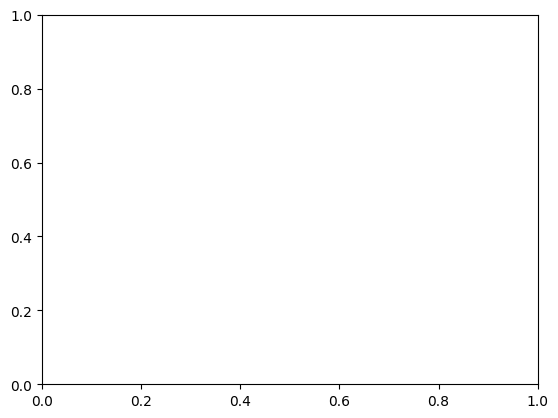

In [30]:
import deepxde as dde
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("der_training_data-31200-elements.csv",index_col=0) #"der_training_data-15600-elements.csv"
df.head()

x_features = ["VaR","VaI","VbR","VbI","VcR","VcI"]
"""
x_train = df[x_features].values[0:10000]
y_train = df[["P","Q"]].values[0:10000]
x_test = df[x_features].values[10000:]
y_test = df[["P","Q"]].values[10000:]
x_train.shape[-1],y_train.shape[-1],x_test.shape
"""

X_train_0 =[]
X_train_1 =[]
y_temp = []
der_ids = list(df.der_id.unique())
n_timestamps = len(df[df["der_id"]==der_ids[0]]) 
n_samples =  len(der_ids)

for i in range(n_samples):
    df_subset = df[i*n_timestamps:(i+1)*n_timestamps]    
    X_train_0.append(df_subset["VaR"].values)
    y_temp.append(df_subset["P"].values)
X_train_1.append(df_subset["t"].values)

n_train_samples = int(n_samples*0.8)
X_train_0 = np.array(X_train_0)
y_temp = np.array(y_temp)
X_train = (X_train_0[0:n_train_samples],np.array(X_train_1).T)
X_test = (X_train_0[n_train_samples:],np.array(X_train_1).T)
y_train = y_temp[0:n_train_samples]
y_test = y_temp[n_train_samples:]

print(X_train[0].shape,X_test[0].shape)
print(X_train[1].shape,X_test[1].shape)

data = dde.data.TripleCartesianProd(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Choose a network
m = n_timestamps #100
dim_x = 1
net = dde.nn.DeepONetCartesianProd([m, 40, 40],
                                   [dim_x, 40, 40],
                                    "relu",
                                    "Glorot normal",
                                  )
# Define a Model
model = dde.Model(data, net)
# Compile and Train
model.compile("adam", lr=0.001, metrics=["mean l2 relative error"])

#losshistory, train_state = model.train(iterations=1000000)



# Initialize a list to store all loss histories
all_losses = []

# Run neural network 10 times
num_run = 10
for run_idx in range(num_run):
    # Train the model for this run
    losshistory, train_state = model.train(iterations=500000)
# Plot the loss trajectory for this run
    plt.figure()
    plt.plot(losshistory)
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title(f"Loss vs. Step - Run {run_idx + 1}")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"loss_history_n_samples-{n_train_samples}_run-{run_idx + 1}.png")
    plt.close()

    all_losses.append(losshistory)  # Collect the loss history for this run

# Show all the generated plots
plt.show()

# Plot the loss trajectory
dde.utils.plot_loss_history(losshistory)
plt.savefig(f"loss_history_n_samples-{n_train_samples}")
plt.show()